In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regresión KNN o K-nearest Neighbor (vecinos más cercanos.)

## ¿Qué es el K-Nearest Neighbors (KNN)?

K-Nearest Neighbors es un algoritmo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. La idea principal del algoritmo es que un punto de datos se clasifica en función de la mayoría de los votos de sus vecinos más cercanos. En el caso de regresión, el valor del punto de datos se calcula como el promedio de los valores de sus vecinos más cercanos.

## ¿Cómo Funciona KNN?

### Elegir el número de vecinos (\( K \)):
Decides cuántos vecinos (puntos de datos más cercanos) considerarás para hacer la predicción.

### Calcular la distancia:
Calculas la distancia entre el punto de datos que deseas clasificar y todos los puntos de datos en el conjunto de entrenamiento. Las distancias más comunes utilizadas son la distancia Euclidiana, la distancia Manhattan, y la distancia Minkowski.

- **Distancia Euclidiana**:
  $
  d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  $

- **Distancia Manhattan**:
  $
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  $

### Seleccionar los \( K \) vecinos más cercanos:
Ordenas las distancias calculadas y seleccionas los \( K \) puntos de datos más cercanos.

### Votar por la clase mayoritaria (para clasificación):
Determinas la clase del nuevo punto de datos tomando la clase más común entre los \( K \) vecinos más cercanos.

### Promediar los valores (para regresión):
Calculas el valor del nuevo punto de datos como el promedio de los valores de los \( K \) vecinos más cercanos.

## Ejemplo de KNN en Clasificación

Supongamos que tenemos un conjunto de datos simple con dos características (\( x1 \) y \( x2 \)) y dos clases (A y B):

| \( x1 \) | \( x2 \) | Clase |
|----------|----------|-------|
| 1.0      | 1.1      | A     |
| 1.5      | 1.6      | A     |
| 3.0      | 3.0      | B     |
| 3.5      | 3.5      | B     |

Queremos clasificar un nuevo punto de datos (2.0, 2.0).

### Calcular las distancias:

- Distancia a (1.0, 1.1):
  $
  \sqrt{(2.0 - 1.0)^2 + (2.0 - 1.1)^2} = \sqrt{1.0 + 0.9} = \sqrt{1.9} \approx 1.38
  $

- Distancia a (1.5, 1.6):
  $
  \sqrt{(2.0 - 1.5)^2 + (2.0 - 1.6)^2} = \sqrt{0.25 + 0.16} = \sqrt{0.41} \approx 0.64
  $

- Distancia a (3.0, 3.0):
  $
  \sqrt{(2.0 - 3.0)^2 + (2.0 - 3.0)^2} = \sqrt{1.0 + 1.0} = \sqrt{2.0} \approx 1.41
  $

- Distancia a (3.5, 3.5):
  $
  \sqrt{(2.0 - 3.5)^2 + (2.0 - 3.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.12
  $

### Seleccionar \( K = 3 \) vecinos más cercanos:

- (1.5, 1.6) - Clase A (Distancia 0.64)
- (1.0, 1.1) - Clase A (Distancia 1.38)
- (3.0, 3.0) - Clase B (Distancia 1.41)

### Votar por la clase mayoritaria:

- Clase A: 2 votos
- Clase B: 1 voto

El nuevo punto de datos (2.0, 2.0) se clasifica como Clase A.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Precisión: 1.00


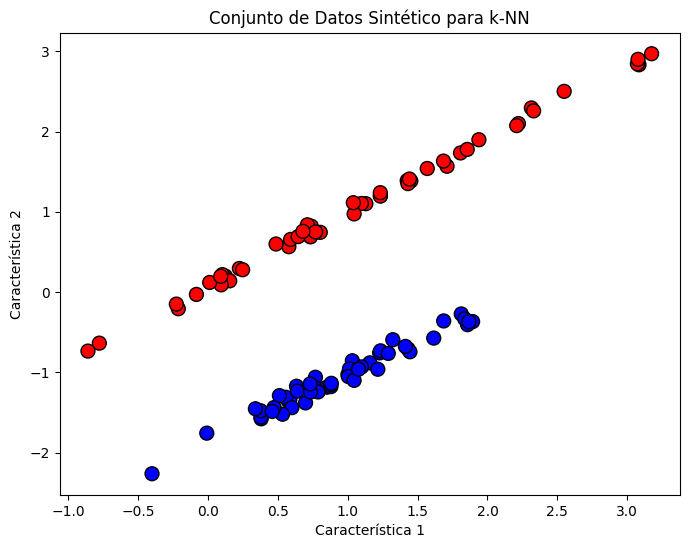

In [14]:
# Generar un conjunto de datos sintético
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Visualizar el conjunto de datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.title('Conjunto de Datos Sintético para k-NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


https://github.com/sagarmk/Knn-from-scratch/blob/master/knn.py